In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
music = pd.read_csv("data/db.csv")

In [3]:
music[music['lyrics'] == 'delete please!']

,Unnamed: 0,acousticness,album_name,artist,artist_followers,artist_genres,artist_popularity,danceability,duration_ms,energy,...,liveness,loudness,lyrics,mode,speechiness,tempo,time_signature,track_name,track_popularity,valence
1423,1423,0.307,Cuando Te Besé,"Becky G,Paulo Londra",4215661.0,"latin viral pop,pop,reggaeton",85.0,0.772,254383.0,0.732,...,0.106,-3.713,delete please!,0.0,0.213,100.048,4.0,Cuando Te Besé,87.0,0.295


In [4]:
music.head()

,Unnamed: 0,acousticness,album_name,artist,artist_followers,artist_genres,artist_popularity,danceability,duration_ms,energy,...,liveness,loudness,lyrics,mode,speechiness,tempo,time_signature,track_name,track_popularity,valence
0,0,0.18700,El Dorado,"Shakira,Maluma",15589793.0,"colombian pop,dance pop,latin,latin pop,mexica...",83.0,0.852,195840.0,0.773,...,0.159,-2.921,cuando estás bien te alejas de mí te sientes s...,0.0,0.0776,102.034,4.0,Chantaje (feat. Maluma),78.0,0.907
1,1,0.40000,Primera Cita,CNCO,5182695.0,"boy band,latin,latin pop,pop,reggaeton,tropical",78.0,0.761,222560.0,0.838,...,0.176,-3.073,qué bien se ve me trae loco su figura ese traj...,0.0,0.0502,93.974,4.0,Reggaetón Lento (Bailemos),77.0,0.710
2,2,0.00431,Vente Pa' Ca,"Ricky Martin,Maluma",4453926.0,"dance pop,latin,latin pop,mexican pop,pop,trop...",73.0,0.663,259196.0,0.920,...,0.101,-4.070,"ven, te cuento de una vez tu descanso está en ...",0.0,0.2260,99.935,4.0,Vente Pa' Ca,75.0,0.533
3,3,0.55100,Energía,"J Balvin,Pharrell Williams,BIA,Sky",13303709.0,"latin,pop,reggaeton",92.0,0.508,205600.0,0.687,...,0.126,-4.361,a ella le gus- a ella le gus- a ella le gus- a...,1.0,0.3260,180.044,4.0,Safari,15.0,0.555
4,4,0.05590,Motivan2,"Zion & Lennox,J Balvin",3187460.0,"latin,latin hip hop,latin pop,pop,reggaeton,tr...",83.0,0.832,209453.0,0.772,...,0.440,-5.429,el sólo verte me dan ganas (precisamente en ca...,1.0,0.1000,96.016,4.0,Otra Vez (feat. J Balvin),76.0,0.704


In [5]:
def grafico_atributo(df,atributo,color):

    fig, ax = plt.subplots(figsize=(25,20))
    sns.set(style="whitegrid")
    sns.set_color_codes("pastel")
    track_ordenados = df
    #track_ordenados = music.sort_values(by=[atributo], ascending=False)
    #primeros = music.head().sort_values(by=[atributo], ascending=False)
    #ultimos = music.tail().sort_values(by=[atributo], ascending=False)
    #track_ordenados = pd.concat([primeros, ultimos])
    
    ax = sns.barplot(x=track_ordenados[atributo], y=track_ordenados['track_name'] +' (' + track_ordenados['artist'] + ')', data=track_ordenados,palette=sns.dark_palette(color, n_colors=50, reverse=True), ci=None)
    plt.ylabel('Artista', fontsize=26)
    plt.xlabel('Valor', fontsize=26)
    plt.title(atributo.title(), fontsize=25)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    #for p in ax.patches:
    #    width = p.get_width()
    #    ax.text(width + 3  ,
    #            p.get_y() + p.get_height()/1.4,
    #            "%d" % width,
    #            ha="center", fontsize=15)
    #sns.despine()
    #plt.savefig('track_popularity.png')
    #plt.plot();

In [6]:
music.shape

(1782, 23)

In [7]:
music = music.dropna(subset=['lyrics'])
music['words'] = music.lyrics.str.strip().str.split('[\W_]+')
#music['words']
rows = list()
for row in music[['words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((word))

words = pd.DataFrame(rows, columns=['word'])

words = words[words.word.str.len() > 0]
words['word'] = words.word.str.lower()



counts = words\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts

,n_w
i,17465
me,14124
que,14077
you,13295
no,10897
a,10805
the,9590
y,8832
la,6961
te,6819


In [8]:
#import nltk
#nltk.download()
#python -m nltk.downloader <collection|package|all>
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from wordcloud import WordCloud

In [9]:
stopwords_spanish = stopwords.words('spanish')
stopwords_english = stopwords.words('english')

In [10]:
for a_stopword in stopwords_spanish:
    if a_stopword in counts.index:
        counts = counts.drop(a_stopword)
        
for a_stopword in stopwords_english:
    if a_stopword in counts.index:
        counts = counts.drop(a_stopword)

In [11]:
top_20 = counts.head(20)
top_20

,n_w
oh,5640
yeah,3077
si,2878
know,2451
baby,2419
like,2362
love,2283
got,1764
quiero,1763
pa,1729


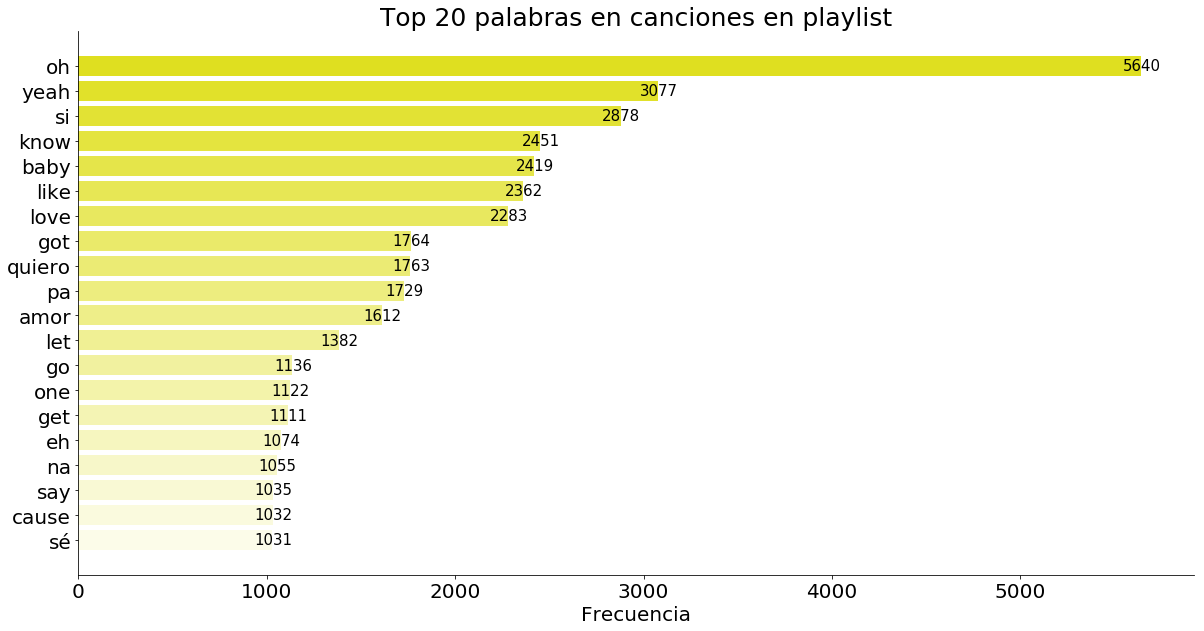

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="n_w", y=top_20.index, data=top_20, palette=sns.light_palette("yellow", n_colors=len(top_20), reverse=True))
plt.ylabel("")
plt.xlabel('Frecuencia', fontsize=20)
plt.title('Top 20 palabras en canciones en playlist', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3  ,
            p.get_y() + p.get_height()/1.4,
            "%d" % width,
            ha="center", fontsize=15)
sns.despine()
plt.savefig('top_words_in_songs.jpg')
plt.plot();

In [13]:
music['artist_genres']

0       colombian pop,dance pop,latin,latin pop,mexica...
1         boy band,latin,latin pop,pop,reggaeton,tropical
2       dance pop,latin,latin pop,mexican pop,pop,trop...
3                                     latin,pop,reggaeton
4       latin,latin hip hop,latin pop,pop,reggaeton,tr...
5       champeta,colombian pop,dance pop,latin,latin p...
6                                           colombian pop
7             dance pop,edm,electropop,pop,tropical house
8              latin,latin hip hop,pop,reggaeton,tropical
9          canadian contemporary r&b,canadian pop,pop,rap
10       dance pop,edm,electronic trap,pop,tropical house
11                                      cubaton,reggaeton
12                            dance pop,pop,post-teen pop
13                                                    pop
14                                                    NaN
15      dance pop,edm,pop,post-teen pop,tropical house...
16                          colombian pop,latin,latin pop
17      dance 

In [14]:
vector_genres = list()
music['artist_genres'].dropna().str.split(',')
for genre in music['artist_genres'].dropna().str.split(','):
    #vector_genres.append(genre)
    if genre:
        vector_genres += genre
#vector_genres        
generos = pd.DataFrame(vector_genres, columns=['genre'])
#generos['genre'].unique()        
#print(vector_genres)
#for i in set(vector_genres):
#    print(i,"--->",vector_genres.count(i))
generos = generos\
    .genre.value_counts()\
    .to_frame()\
    .rename(columns={'genre':'n_g'})

top10_genres = generos.head(10)

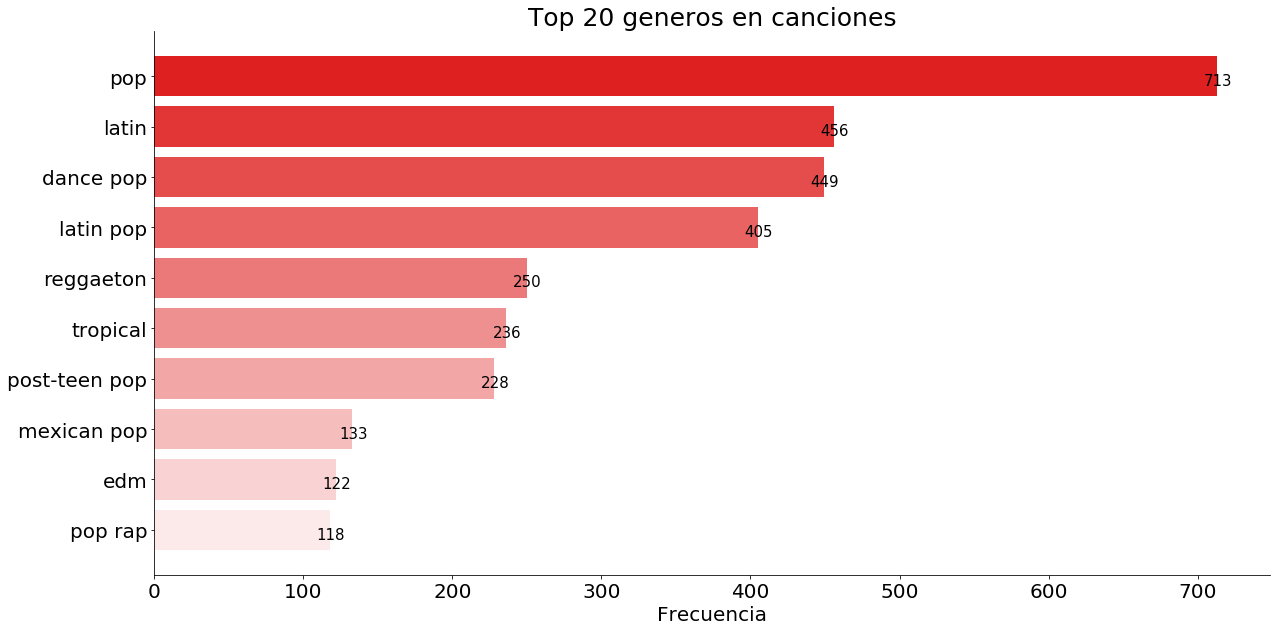

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="n_g", y=top10_genres.index, data=top10_genres, palette=sns.light_palette("red", n_colors=len(top10_genres), reverse=True))
plt.ylabel("")
plt.xlabel('Frecuencia', fontsize=20)
plt.title('Top 20 generos en canciones', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5  ,
            p.get_y() + p.get_height()/1.4,
            "%d" % width,
            ha="center", fontsize=15)
sns.despine()
plt.savefig('top_generos.jpg')
plt.plot();

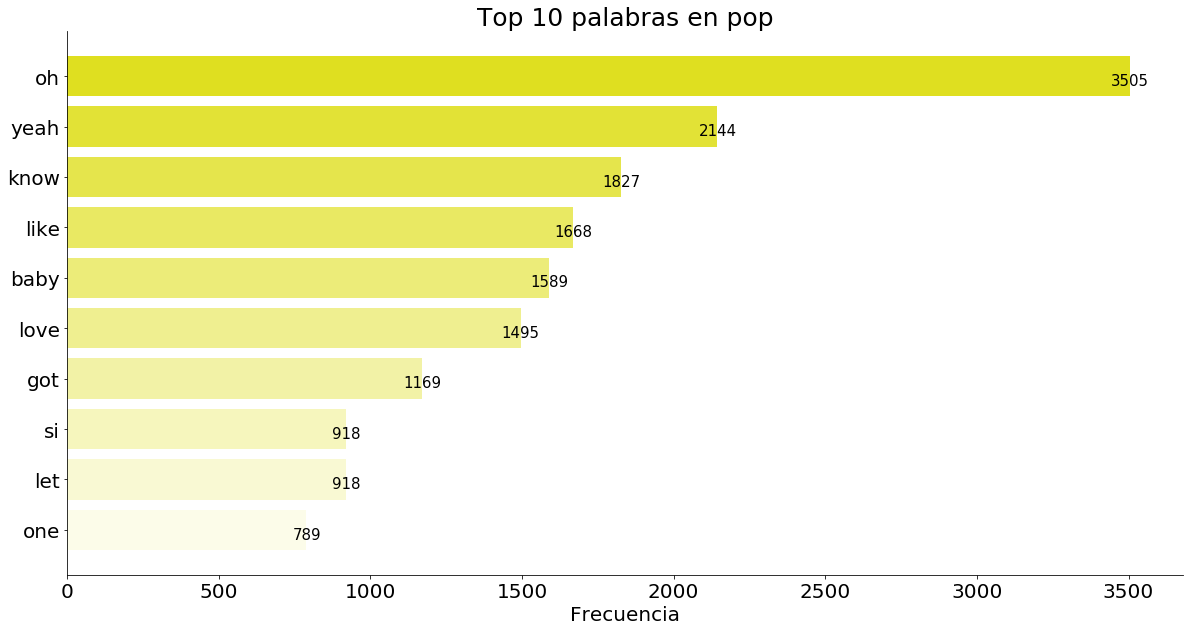

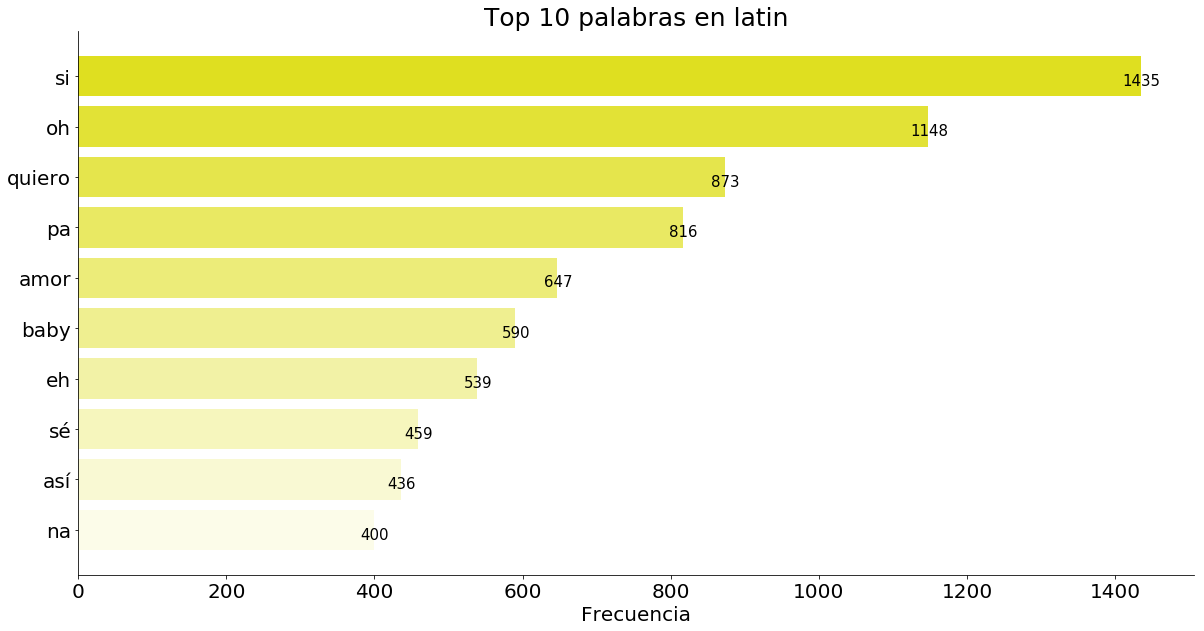

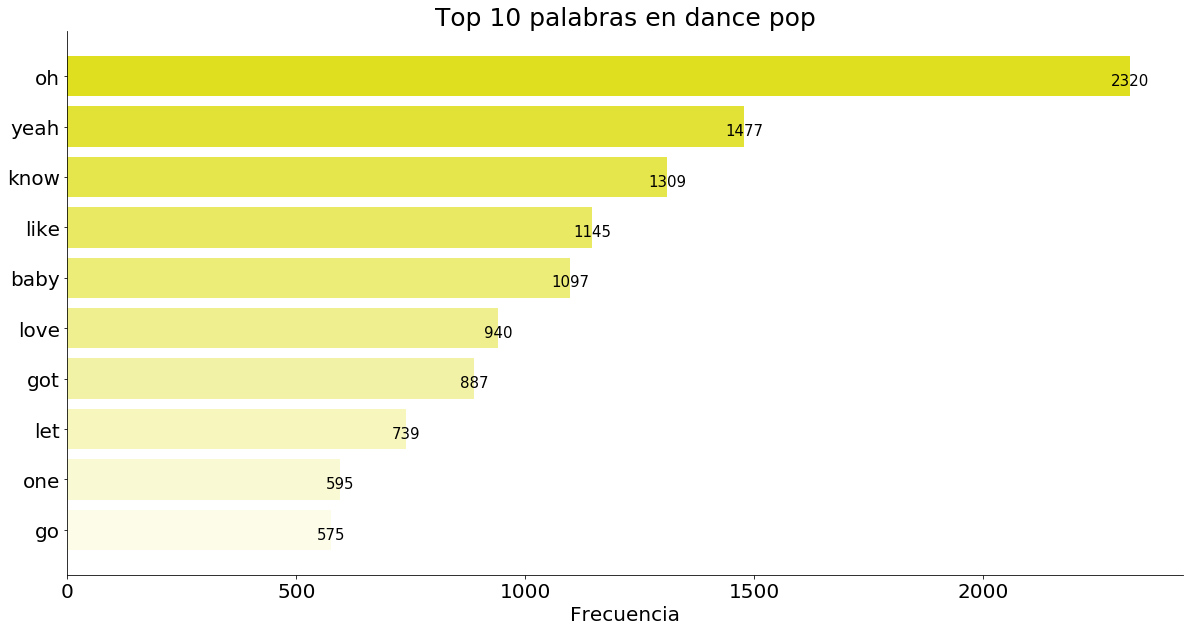

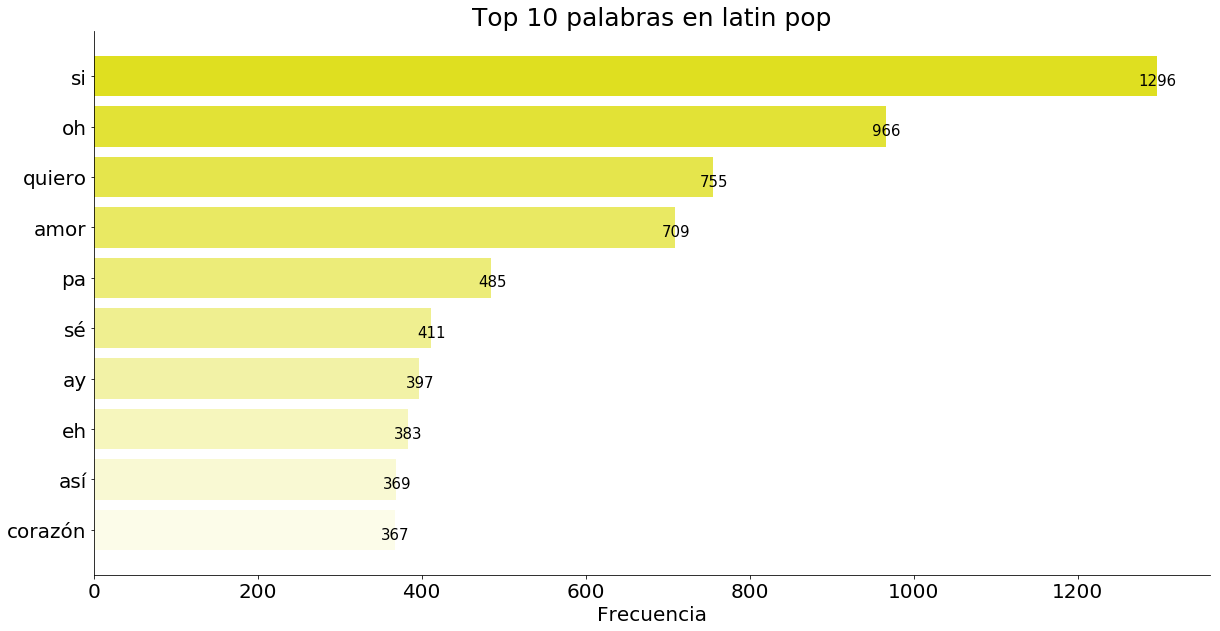

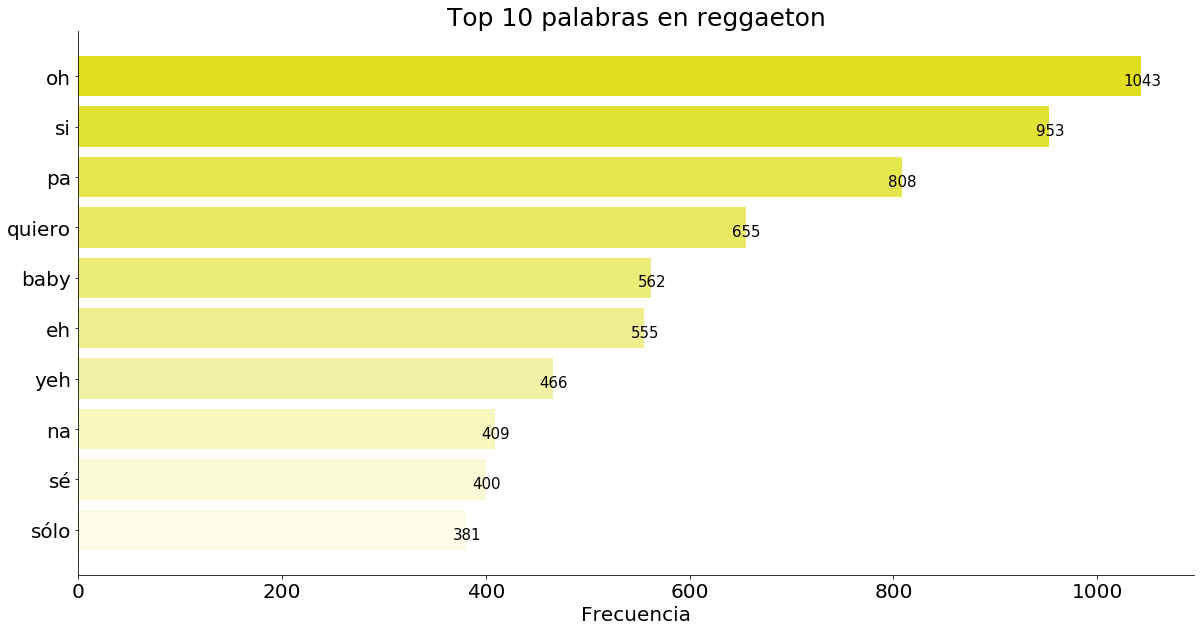

In [16]:
# palabras más comunes por genero

words_by_genre = pd.DataFrame()
for row in music[['artist_genres','words']].dropna().iterrows():
    genre = row[1].artist_genres.split(',')
    words = row[1].words
    for g in genre:
        words_by_genre = words_by_genre.append({'genre':g,'words':words},ignore_index=True)

df_wbg = words_by_genre.groupby(['genre']).apply(lambda x: x['words'].sum())
df = pd.concat([df_wbg,generos], axis=1, sort=True).sort_values(by=['n_g'], ascending=False)[:5] # primeros 5
#df = pd.concat([df_wbg,generos], axis=1, sort=True).sort_values(by=['n_g'], ascending=False)[-5:] # ultimos 5

for i, v in df[0].items():
    #print(i,v)
    rows = list()
    for word in v:
        rows.append((word))
    words = pd.DataFrame(rows, columns=['word'])
    words = words[words.word.str.len() > 0]
    words['word'] = words.word.str.lower()
    counts = words\
        .word.value_counts()\
        .to_frame()\
        .rename(columns={'word':'n_w'})
    
    for a_stopword in stopwords_spanish:
        if a_stopword in counts.index:
            counts = counts.drop(a_stopword)

    for a_stopword in stopwords_english:
        if a_stopword in counts.index:
            counts = counts.drop(a_stopword)    
    #print("-"*40)
    #print(i)
    #print(counts.head(10))
    counts = counts.head(10)
    fig, ax = plt.subplots(figsize=(20,10))
    ax = sns.barplot(x="n_w", y=counts.index, data=counts, palette=sns.light_palette("yellow", n_colors=10, reverse=True))
    plt.ylabel("")
    plt.xlabel('Frecuencia', fontsize=20)
    plt.title('Top 10 palabras en ' + i, fontsize=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.8  ,
                p.get_y() + p.get_height()/1.4,
                "%d" % width,
                ha="center", fontsize=15)
    sns.despine()
    plt.plot();    

In [17]:
# calculando otra vez densidad lyrica y léxica
music['duration_s'] = music['duration_ms']/1000.0
#music['amount_of_words'] = music['words'].str.len()
#music['lyric_density'] = music['amount_of_words']/music['duration_s']
stopset = set(stopwords_spanish + stopwords_english)
music['tokens'] = pd.Series(dtype=object)
for index, row in music.iterrows():
    try:
        #print(row['lyrics'])
        tokens = word_tokenize(row['lyrics'])
        tokens_wo_stopwords = [word for word in tokens if not word in stopset]
        music.at[index, 'tokens'] = tokens_wo_stopwords
        music.at[index, 'le_d'] = ( len(tokens_wo_stopwords) / len(tokens) ) * 100
        music.at[index, 'ly_d'] = len(tokens) / row['duration_s']
        music.at[index, 'n_words'] = len(tokens)
        music.at[index, 'n_words_no_rep'] = len(list(set(tokens)))
    except: # songs without lyrics throw exceptions, i'm lazy
        continue

music['le_d'] = music['le_d'].fillna(0)
music['ly_d'] = music['ly_d'].fillna(0)

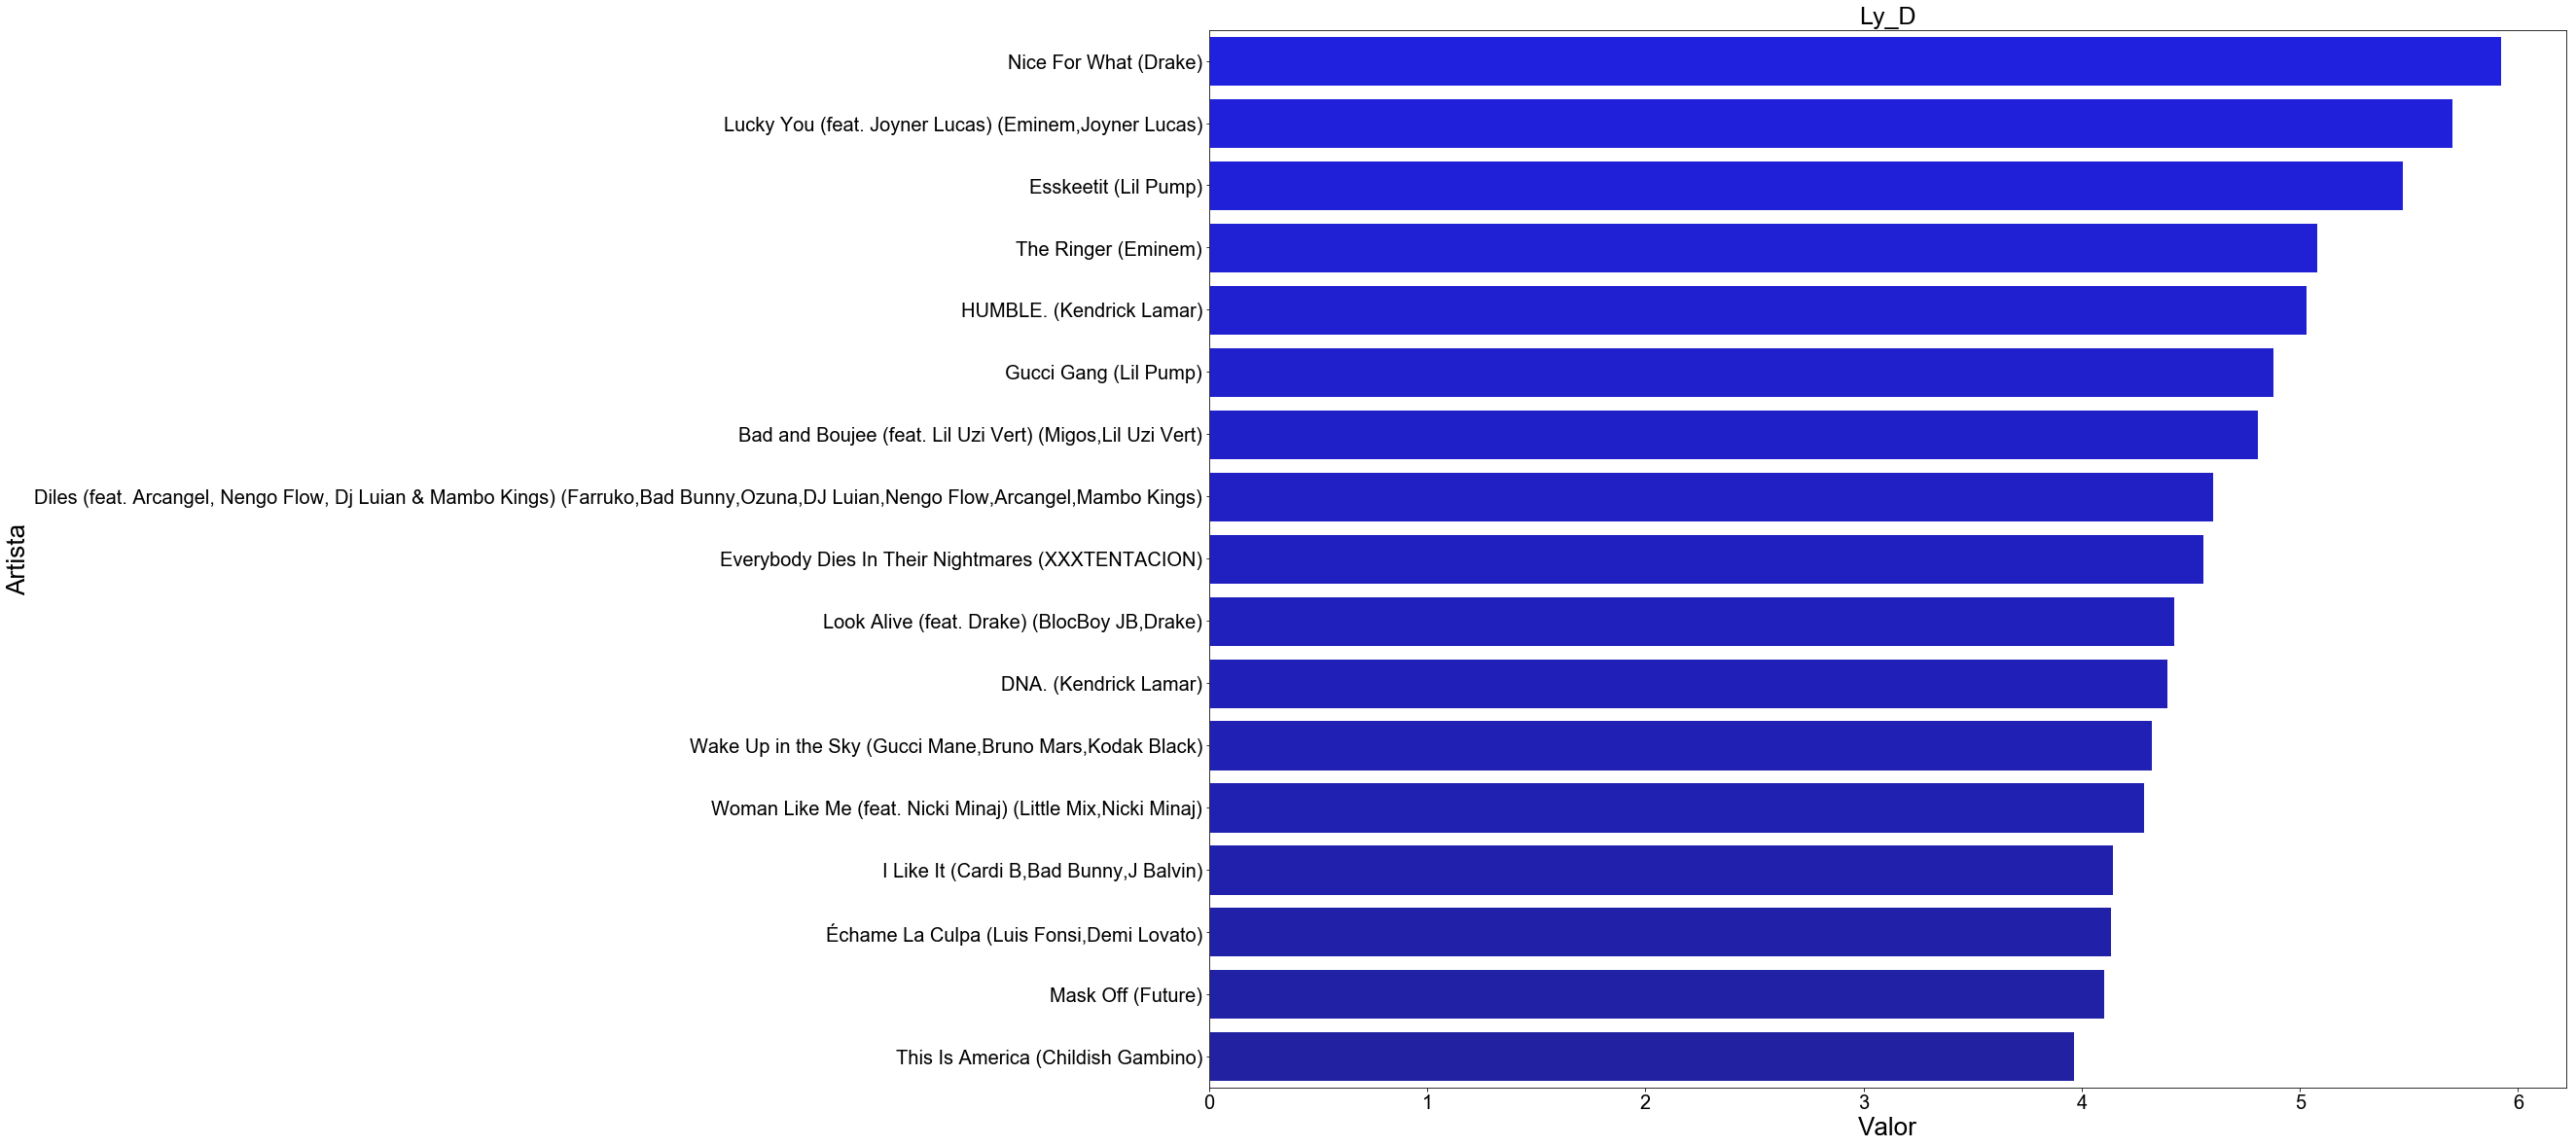

In [18]:
# DENSIDAD LÍRICA
track_ordenados = music.sort_values(by=["ly_d"], ascending=False)[:20]
grafico_atributo(track_ordenados, "ly_d","blue")

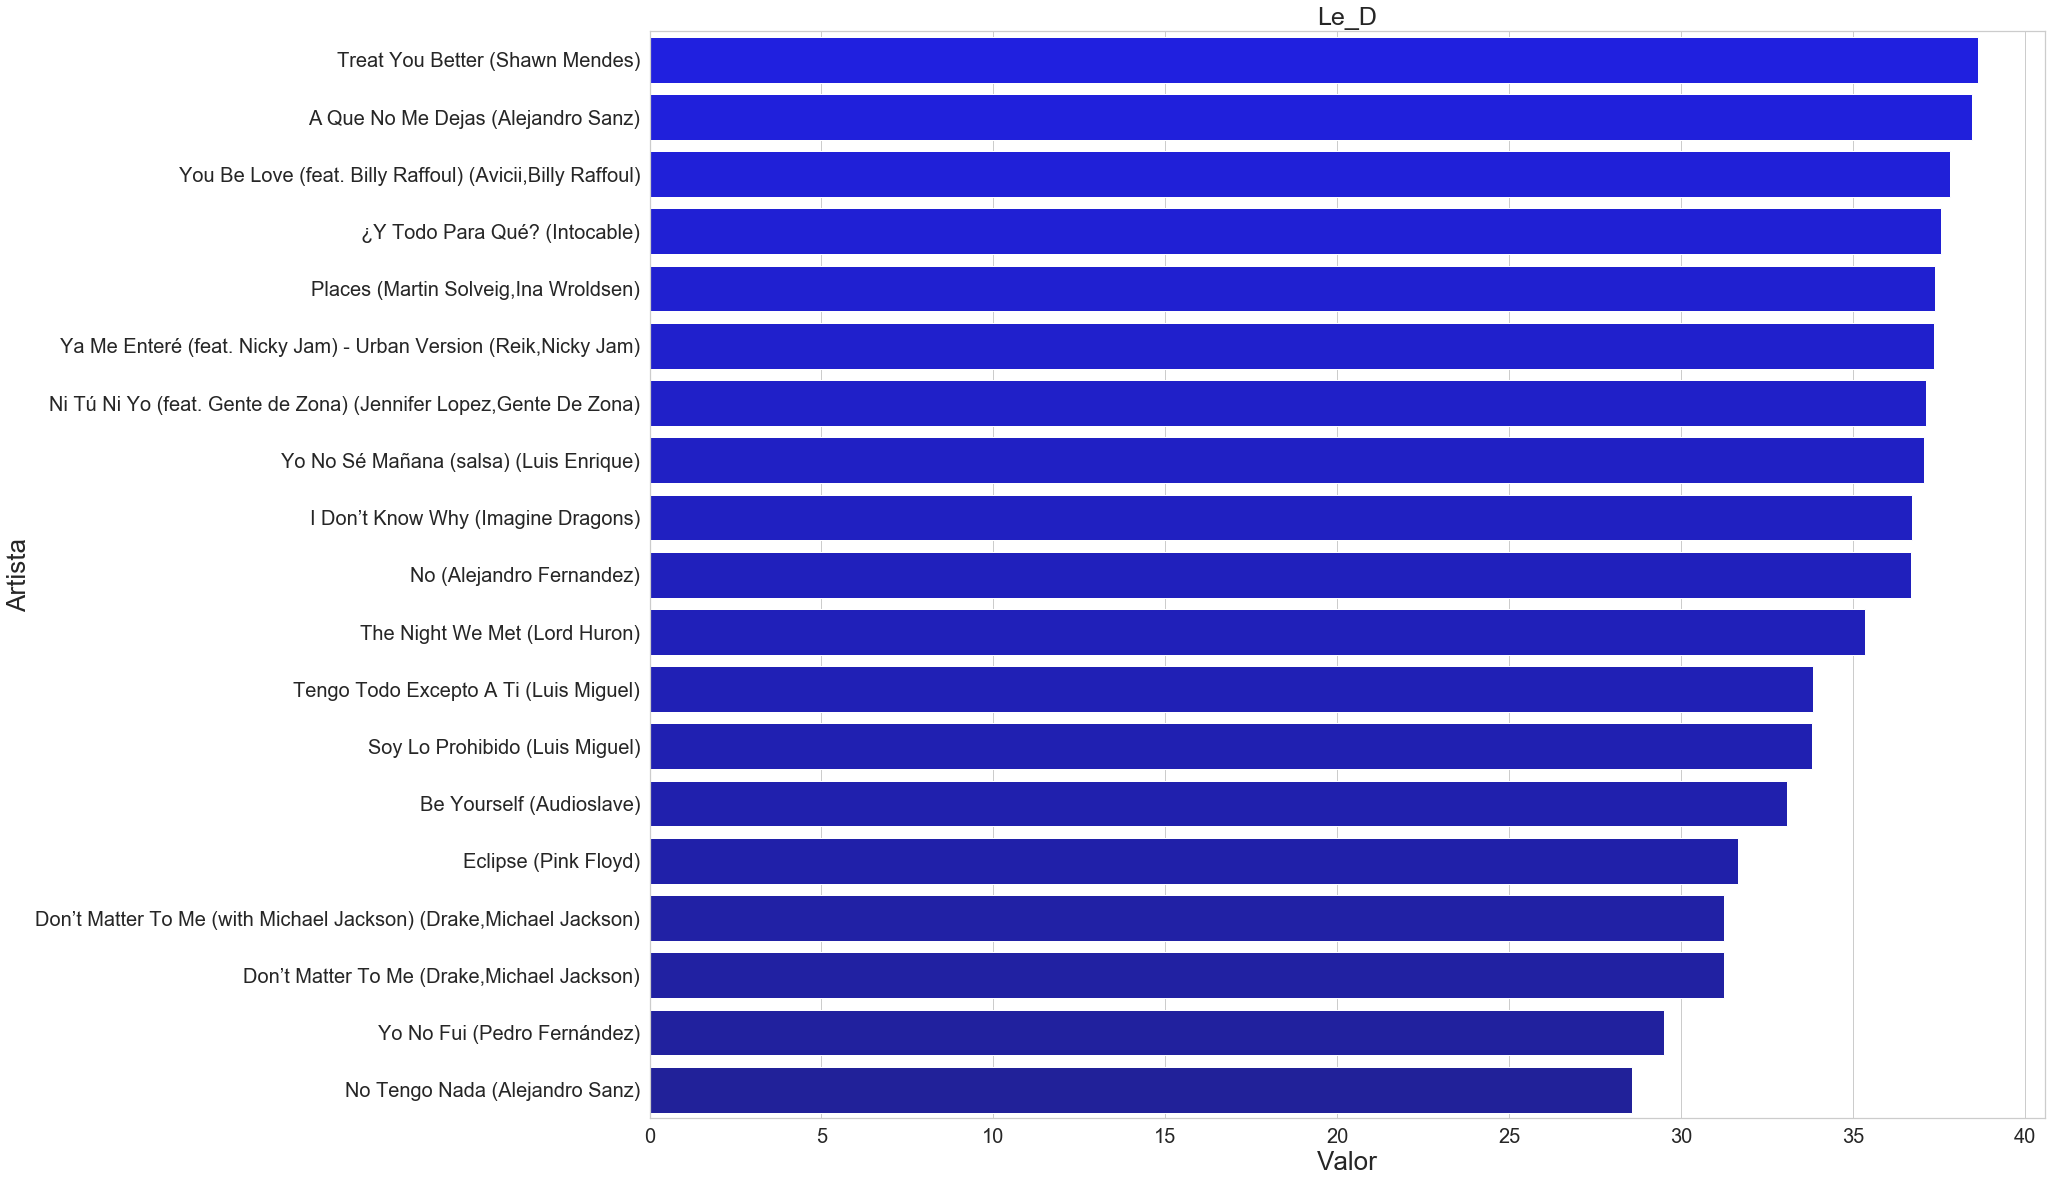

In [19]:
# DENSIDAD LÉXICA
track_ordenados = music.sort_values(by=["le_d"], ascending=False)[-20:]
grafico_atributo(track_ordenados, "le_d","blue")

In [20]:
# DENSIDAD LÉXICA por ARTISTA
tracks_ordenados2 = music.groupby(['artist'])["n_words_no_rep"].agg(['size', 'sum', 'mean'])
tracks_ordenados2.sort_values(('mean'), ascending=False, inplace=True)
tracks_ordenados2
#tracks_ordenados2['mean'].index
#track_ordenados = music.sort_values(by=["le_d"], ascending=False)[-20:]


,size,sum,mean
artist,,,
"Farruko,Bad Bunny,Ozuna,DJ Luian,Nengo Flow,Arcangel,Mambo Kings",1,489.0,489.000000
Eminem,2,964.0,482.000000
"Eminem,Joyner Lucas",1,466.0,466.000000
"Chris Jeday,J Balvin,Ozuna,Cardi B,Offset,Anuel,Arcangel",1,372.0,372.000000
"Migos,Lil Uzi Vert",1,353.0,353.000000
"Anuel Aa,Daddy Yankee,Wisin,Farruko,Zion & Lennox",1,315.0,315.000000
"Cardi B,Bad Bunny,J Balvin",1,312.0,312.000000
"Eminem,Ed Sheeran",2,578.0,289.000000
"Kendrick Lamar,SZA",3,843.0,281.000000


In [21]:
music[music['artist'] == 'Becky G,Paulo Londra']
music[music['artist'] == 'David Guetta,Cedric Gervais,Chris Willis']


,Unnamed: 0,acousticness,album_name,artist,artist_followers,artist_genres,artist_popularity,danceability,duration_ms,energy,...,track_name,track_popularity,valence,words,duration_s,tokens,le_d,ly_d,n_words,n_words_no_rep
233,233,0.00718,Would I Lie To You,"David Guetta,Cedric Gervais,Chris Willis",17917265.0,"dance pop,edm,pop",89.0,0.671,197648.0,0.826,...,Would I Lie To You - Radio Edit,67.0,0.774,[instrumental],197.648,[instrumental],100.0,0.005059,1.0,1.0


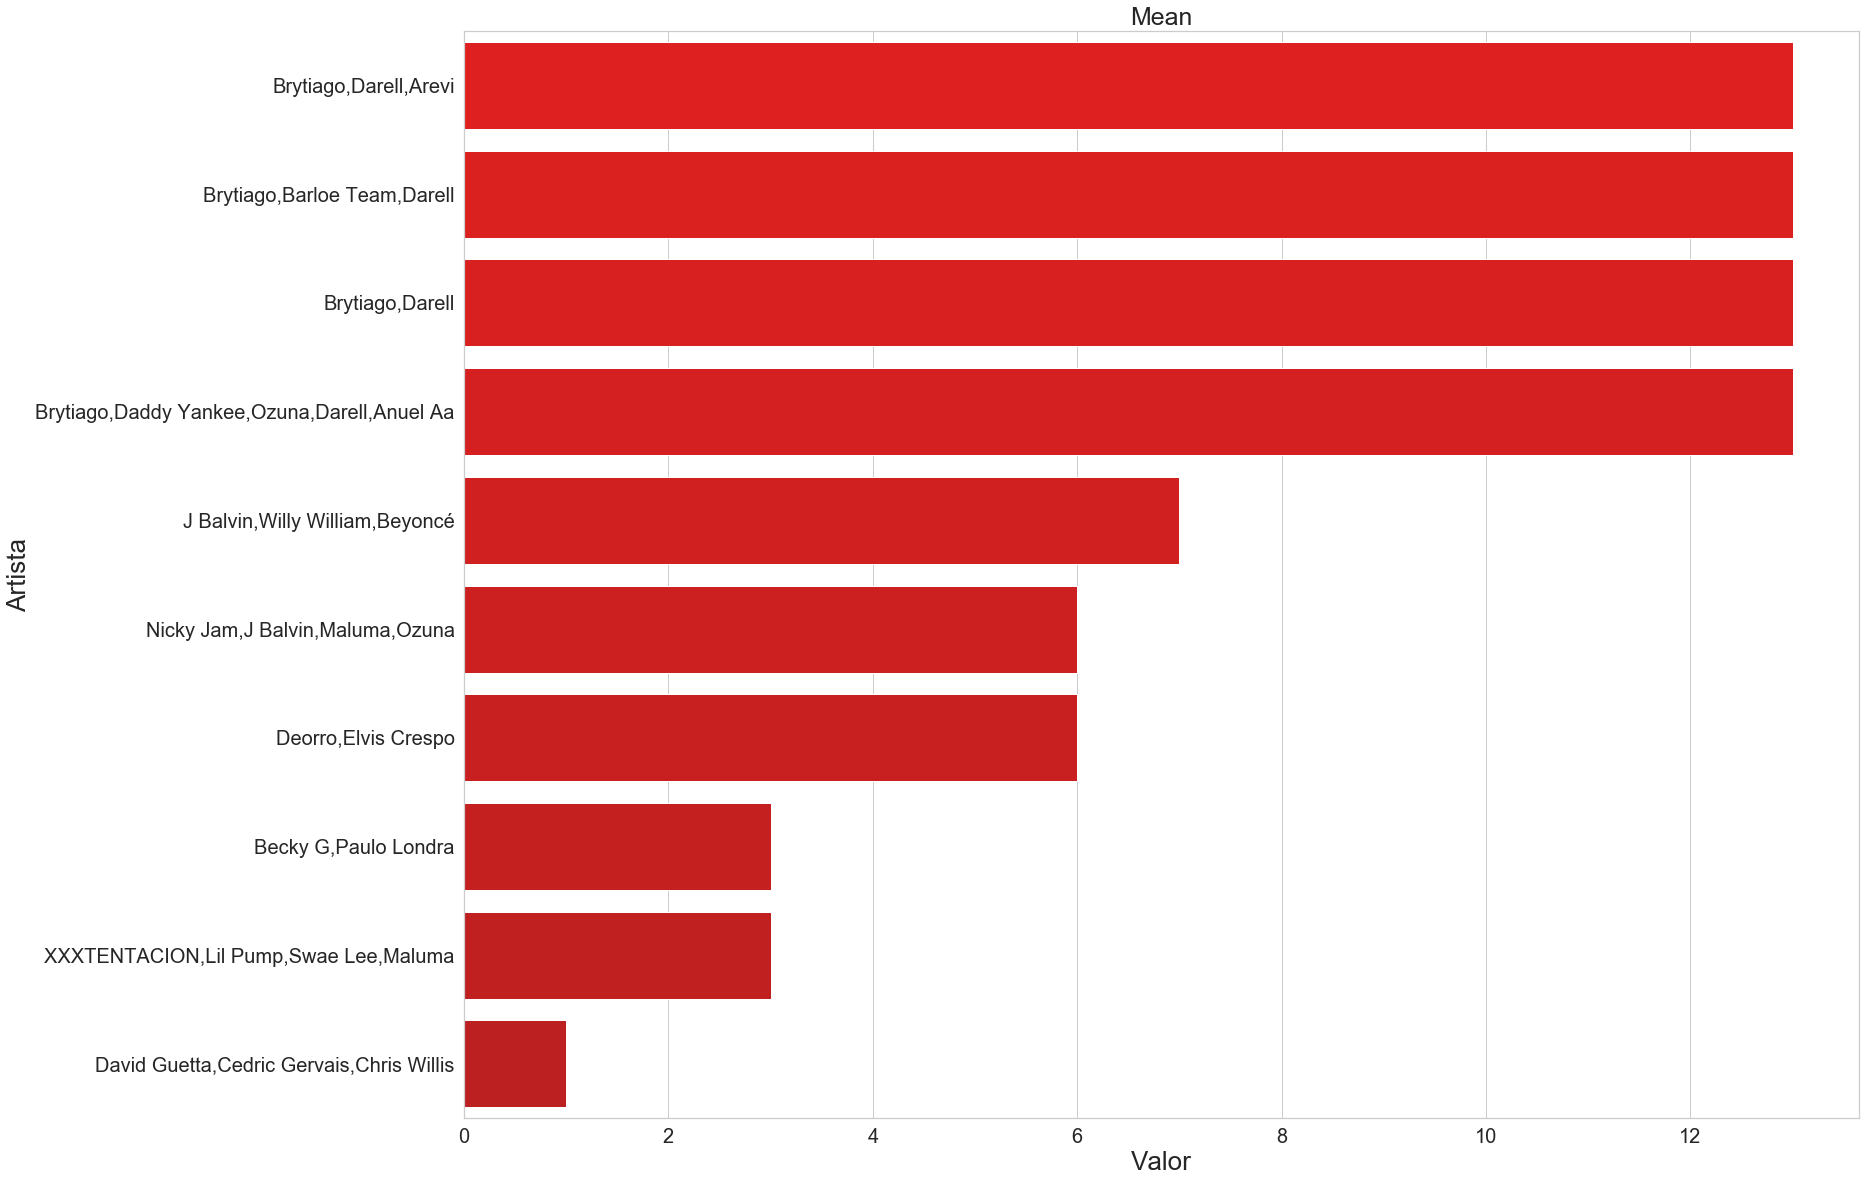

In [22]:
fig, ax = plt.subplots(figsize=(25,20))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
track_ordenados = tracks_ordenados2[-10:]
ax = sns.barplot(x=track_ordenados['mean'], y=track_ordenados.index, data=track_ordenados,palette=sns.dark_palette("red", n_colors=50, reverse=True), ci=None)
plt.ylabel('Artista', fontsize=26)
plt.xlabel('Valor', fontsize=26)
plt.title('mean'.title(), fontsize=25)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

In [23]:
words_by_genre = pd.DataFrame()
for row in music[['artist_genres','lyrics','duration_s']].dropna().iterrows():
    #print(row)
    genre = row[1].artist_genres.split(',')
    lyrics = row[1].lyrics
    duration_s = row[1].duration_s
    for g in genre:
        words_by_genre = words_by_genre.append({'genre':g,'lyrics':lyrics,'duration_s':duration_s},ignore_index=True)

#print(words_by_genre.head(10))
df_wbg = words_by_genre.groupby(['genre']).apply(lambda x: x['lyrics'].sum())
df_time = words_by_genre.groupby(['genre']).apply(lambda x: x['duration_s'].mean())
df = pd.concat([df_wbg,generos,df_time ], axis=1, sort=True).sort_values(by=['n_g'], ascending=False) # primeros 5

df['tokens'] = pd.Series(dtype=object)
for index, row in df.iterrows():
    try:
        tokens = word_tokenize(row[0])
        #print(tokens)
        tokens_wo_stopwords = [word for word in tokens if not word in stopset]
        df.at[index, 'tokens'] = tokens_wo_stopwords
        df.at[index, 'le_d'] = ( len(tokens_wo_stopwords) / len(tokens) ) * 100
        df.at[index, 'ly_d'] = len(tokens) / row[1]
        df.at[index, 'n_words'] = len(tokens)
        df.at[index, 'n_words_no_rep'] = len(list(set(tokens)))
    except: # songs without lyrics throw exceptions, i'm lazy
        continue


df['le_d'] = df['le_d'].fillna(0)
df['ly_d'] = df['ly_d'].fillna(0)

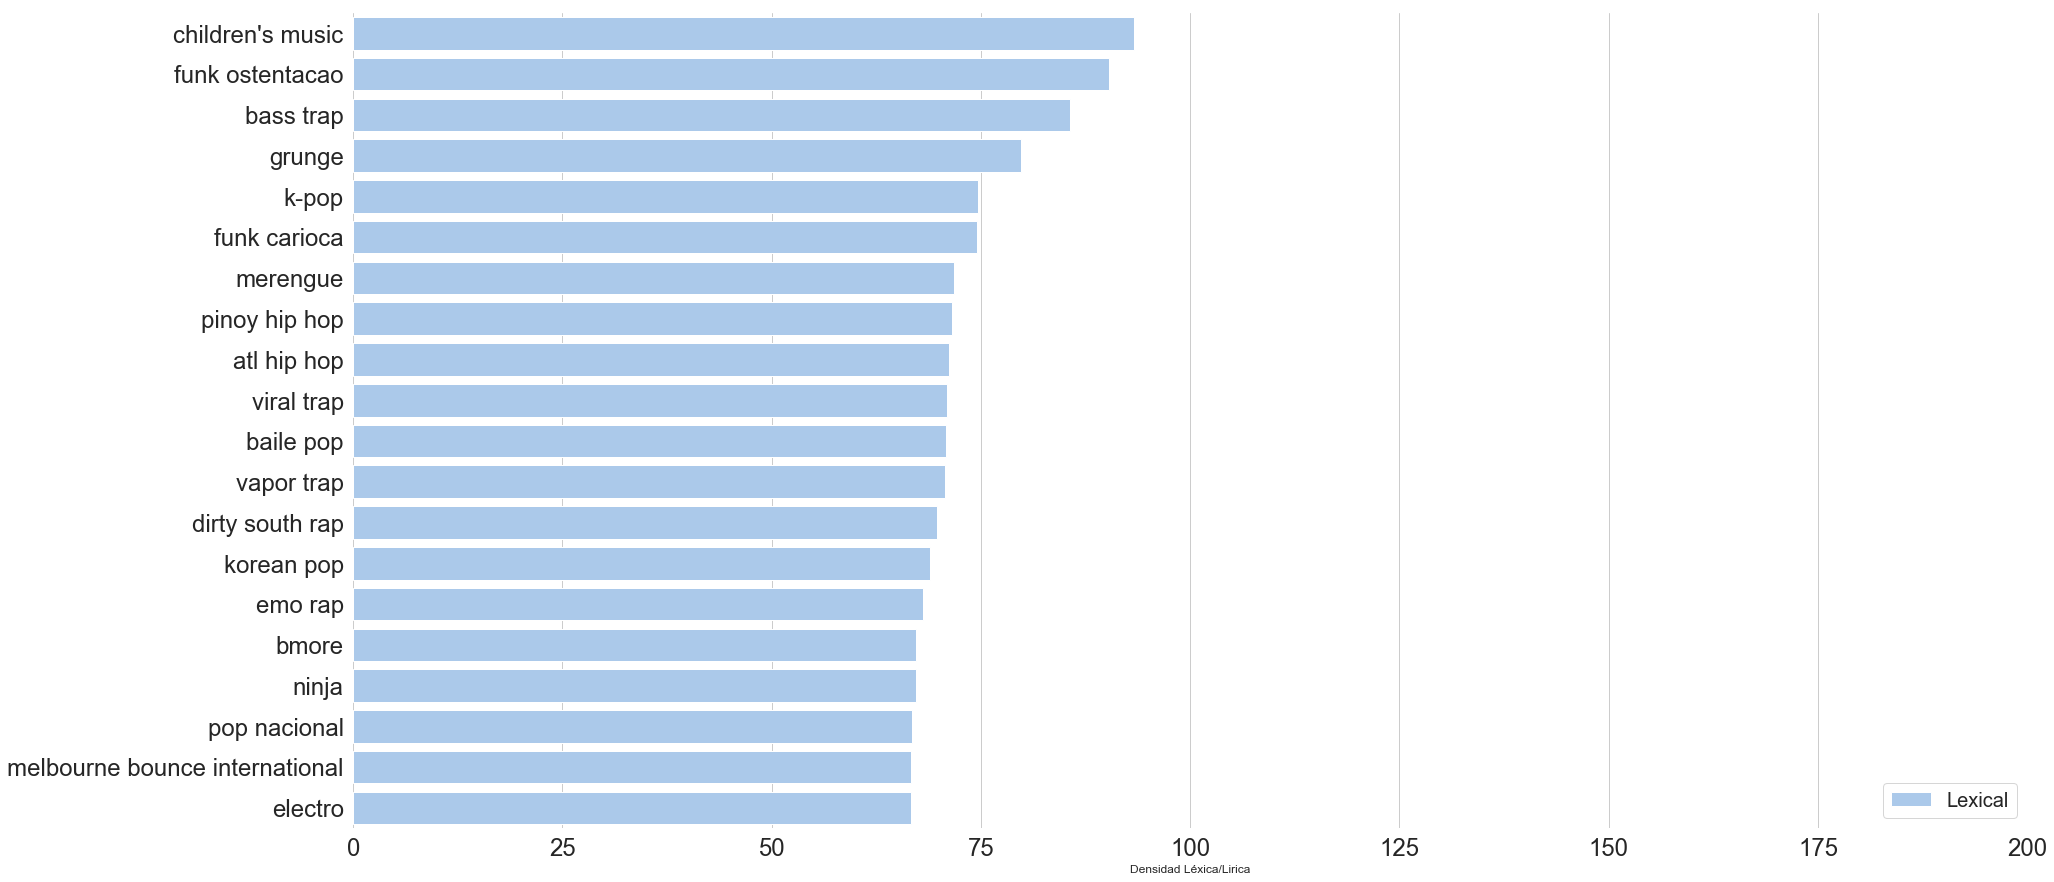

In [24]:
fig, ax = plt.subplots(figsize=(30,15))
df1 = df.sort_values(by=["le_d"], ascending=False)[:20]
ax = sns.barplot(x="le_d", y=df1.index, data=df1, label="Lexical", color="b")

# Plot the crashes where alcohol was involved
#ax = sns.barplot(x="ly_d", y=df.index, data=df,label="Lyrical", color="r", ax=ax)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(24) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24)
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize=20)
ax.set(xlim=(0, 200), ylabel="",xlabel="Densidad Léxica/Lirica")
sns.despine(left=True, bottom=True)

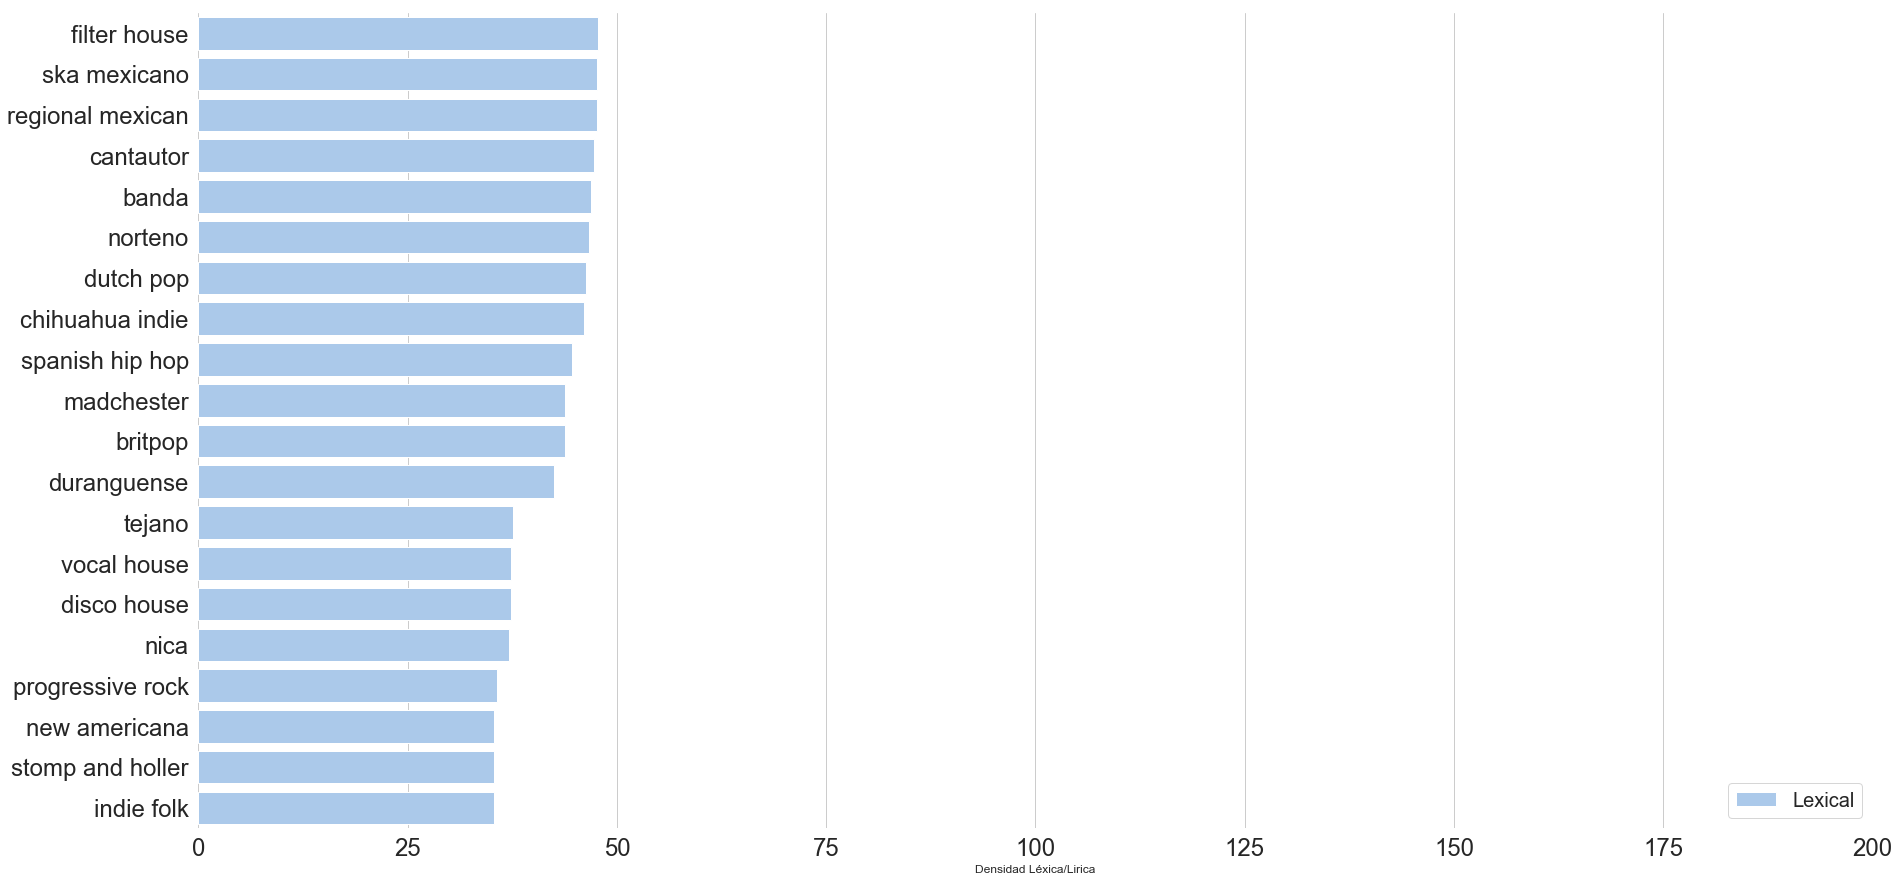

In [25]:
fig, ax = plt.subplots(figsize=(30,15))
df2 = df.sort_values(by=["le_d"], ascending=False)[-20:]
ax = sns.barplot(x="le_d", y=df2.index, data=df2, label="Lexical", color="b")

# Plot the crashes where alcohol was involved
#ax = sns.barplot(x="ly_d", y=df.index, data=df,label="Lyrical", color="r", ax=ax)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(24) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24)
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize=20)
ax.set(xlim=(0, 200), ylabel="",xlabel="Densidad Léxica/Lirica")
sns.despine(left=True, bottom=True)

In [26]:
music.columns.values

array(['Unnamed: 0', 'acousticness', 'album_name', 'artist',
       'artist_followers', 'artist_genres', 'artist_popularity',
       'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'lyrics',
       'mode', 'speechiness', 'tempo', 'time_signature', 'track_name',
       'track_popularity', 'valence', 'words', 'duration_s', 'tokens',
       'le_d', 'ly_d', 'n_words', 'n_words_no_rep'], dtype=object)

In [27]:
music.shape
music.drop_duplicates(['artist','track_name'])
# DENSIDAD LÉXICA
track_ordenados = music.sort_values(by=["le_d"], ascending=False)[-20:]
track_ordenados
#grafico_atributo(track_ordenados, "le_d","blue")

,Unnamed: 0,acousticness,album_name,artist,artist_followers,artist_genres,artist_popularity,danceability,duration_ms,energy,...,track_name,track_popularity,valence,words,duration_s,tokens,le_d,ly_d,n_words,n_words_no_rep
81,81,0.1230,Illuminate,Shawn Mendes,15307851.0,"canadian pop,dance pop,pop,post-teen pop,viral...",88.0,0.624,187973.0,0.803,...,Treat You Better,0.0,0.8210,"[i, won, t, lie, to, you, i, know, he, s, just...",187.973,"[wo, n't, lie, know, 's, right, tell, 'm, see,...",38.636364,1.638533,308.0,93.0
250,250,0.4410,Sirope,Alejandro Sanz,2889823.0,"cantautor,latin,latin arena pop,latin pop,mexi...",78.0,0.652,311178.0,0.634,...,A Que No Me Dejas,61.0,0.4920,"[nosotros, éramos, los, que, eramos, ayer, y, ...",311.178,"[eramos, ayer, mañana, ``, quedo, '', ,, si, q...",38.445808,1.571448,489.0,135.0
1189,1189,0.0351,AVĪCI (01),"Avicii,Billy Raffoul",12450045.0,"big room,dance pop,edm,pop,tropical house",83.0,0.826,207546.0,0.466,...,You Be Love (feat. Billy Raffoul),38.0,0.5480,"[you, can, be, the, potter, i, ll, be, the, cl...",207.546,"[potter, 'll, clay, blacksmith, 'll, blade, po...",37.804878,1.580373,328.0,60.0
734,734,0.3360,Llévame Contigo,Intocable,885698.0,"banda,grupera,latin,latin pop,norteno,ranchera...",71.0,0.694,190533.0,0.637,...,¿Y Todo Para Qué?,63.0,0.7820,"[que, mas, quieres, de, mi, si, ya, todo, te, ...",190.533,"[mas, quieres, si, di, di, cariño, ,, di, conf...",37.569061,0.949967,181.0,60.0
245,245,0.2640,Places,"Martin Solveig,Ina Wroldsen",949246.0,"big room,dance pop,disco house,edm,electro hou...",68.0,0.728,202746.0,0.858,...,Places,20.0,0.6380,"[i, come, back, to, the, places, where, we, fo...",202.746,"[come, back, places, found, us, 're, somewhere...",37.383178,1.583262,321.0,48.0
70,70,0.2340,Des/Amor,"Reik,Nicky Jam",2651809.0,"latin,latin arena pop,latin pop,mexican pop,po...",83.0,0.768,219227.0,0.742,...,Ya Me Enteré (feat. Nicky Jam) - Urban Version,68.0,0.7970,"[ya, me, enteré, que, hay, alguien, nuevo, aca...",219.227,"[enteré, alguien, nuevo, acariciando, piel, al...",37.362637,1.660379,364.0,104.0
601,601,0.1230,Ni Tú Ni Yo (feat. Gente de Zona),"Jennifer Lopez,Gente De Zona",6070536.0,"dance pop,pop,pop rap,post-teen pop,r&b,urban ...",78.0,0.673,215880.0,0.907,...,Ni Tú Ni Yo (feat. Gente de Zona),64.0,0.7680,"[, gente, de, zona, lo, mejor, que, suena, aho...",215.880,"[¡gente, zona, !, mejor, suena, ahora, jlo, vi...",37.131631,2.357791,509.0,122.0
132,132,0.6650,Ciclos,Luis Enrique,313247.0,"latin,latin pop,nica,salsa,tropical",61.0,0.640,259853.0,0.830,...,Yo No Sé Mañana (salsa),65.0,0.7400,"[yo, no, se, si, tu, no, se, si, yo, seguiremo...",259.853,"[si, si, seguiremos, siendo, hoy, si, después,...",37.068966,1.339219,348.0,127.0
579,579,0.0058,Evolve,Imagine Dragons,17051219.0,"modern rock,rock",91.0,0.475,190120.0,0.657,...,I Don’t Know Why,14.0,0.0707,"[we, could, be, strangers, in, the, night, we,...",190.120,"[could, strangers, night, could, passing, shad...",36.718750,2.019777,384.0,65.0
740,740,0.5730,Grandes Exitos A La Manera De Alejandro Fernandez,Alejandro Fernandez,2032866.0,"grupera,latin,latin arena pop,latin pop,mexica...",77.0,0.527,195267.0,0.224,...,No,62.0,0.3140,"[no, porque, tus, errores, me, tienen, cansado...",195.267,"[errores, cansado, nuestas, vidas, pasado, dad...",36.690647,0.711846,139.0,58.0


In [28]:
#pd.melt(music, value_vars=['artist_genres'],id_vars=['le_d', 'ly_d'])
music_subset = music[['le_d','ly_d','artist_genres']]
music_subset = music_subset.artist_genres.str.split(',', expand=True)\
.merge(music_subset, right_index = True, left_index = True)\
.drop(["artist_genres"], axis = 1)\
.melt(id_vars = ['le_d', 'ly_d'], value_name = "genres")\
.drop("variable", axis = 1)\
.dropna()


In [29]:
list(generos.head().index)
music_subset2 = music_subset[music_subset['genres'].isin(generos.head(10).index)]
#music_subset2 = music_subset[music_subset['genres'].isin(generos.index)]
music_subset2

,le_d,ly_d,genres
2,62.469734,1.593389,dance pop
3,48.288288,2.699416,latin
4,62.555066,2.167551,latin
7,61.666667,1.714566,dance pop
8,74.545455,3.520826,latin
10,67.222222,1.748023,dance pop
12,67.869416,2.575415,dance pop
13,60.863309,3.240395,pop
15,70.691676,3.397215,dance pop
17,48.243560,2.126356,dance pop


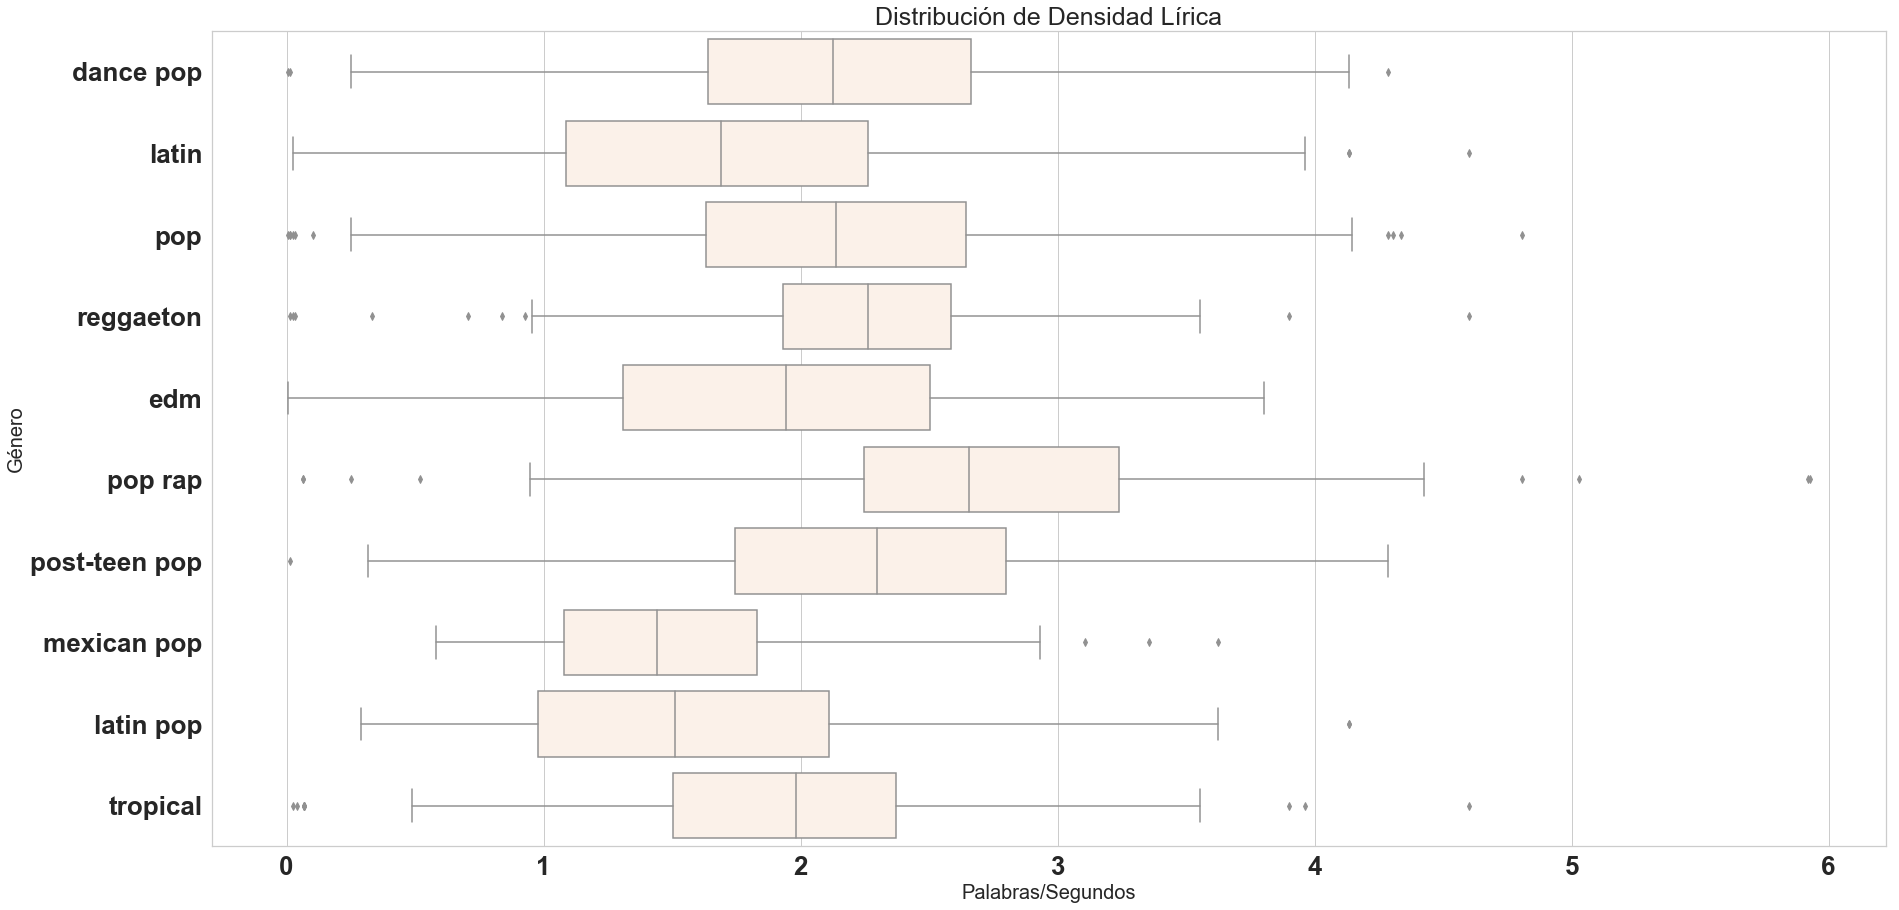

In [39]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.boxplot(x="ly_d", y="genres", data=music_subset2, orient='h', palette=sns.light_palette("orange", n_colors=len(music_subset2), input="xkcd"))
#ax = sns.swarmplot(x="ly_d", y="genres", data=music_subset2, orient='h', size=10, color="xkcd:charcoal")
plt.xlabel('Palabras/Segundos', fontsize=20)
plt.ylabel('Género', fontsize=20)
plt.title('Distribución de Densidad Lírica', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(26)
    tick.label.set_fontweight("bold")
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(26)
    tick.label.set_fontweight("bold")
#plt.savefig('img/tempo_by_albums.jpg')

plt.plot();

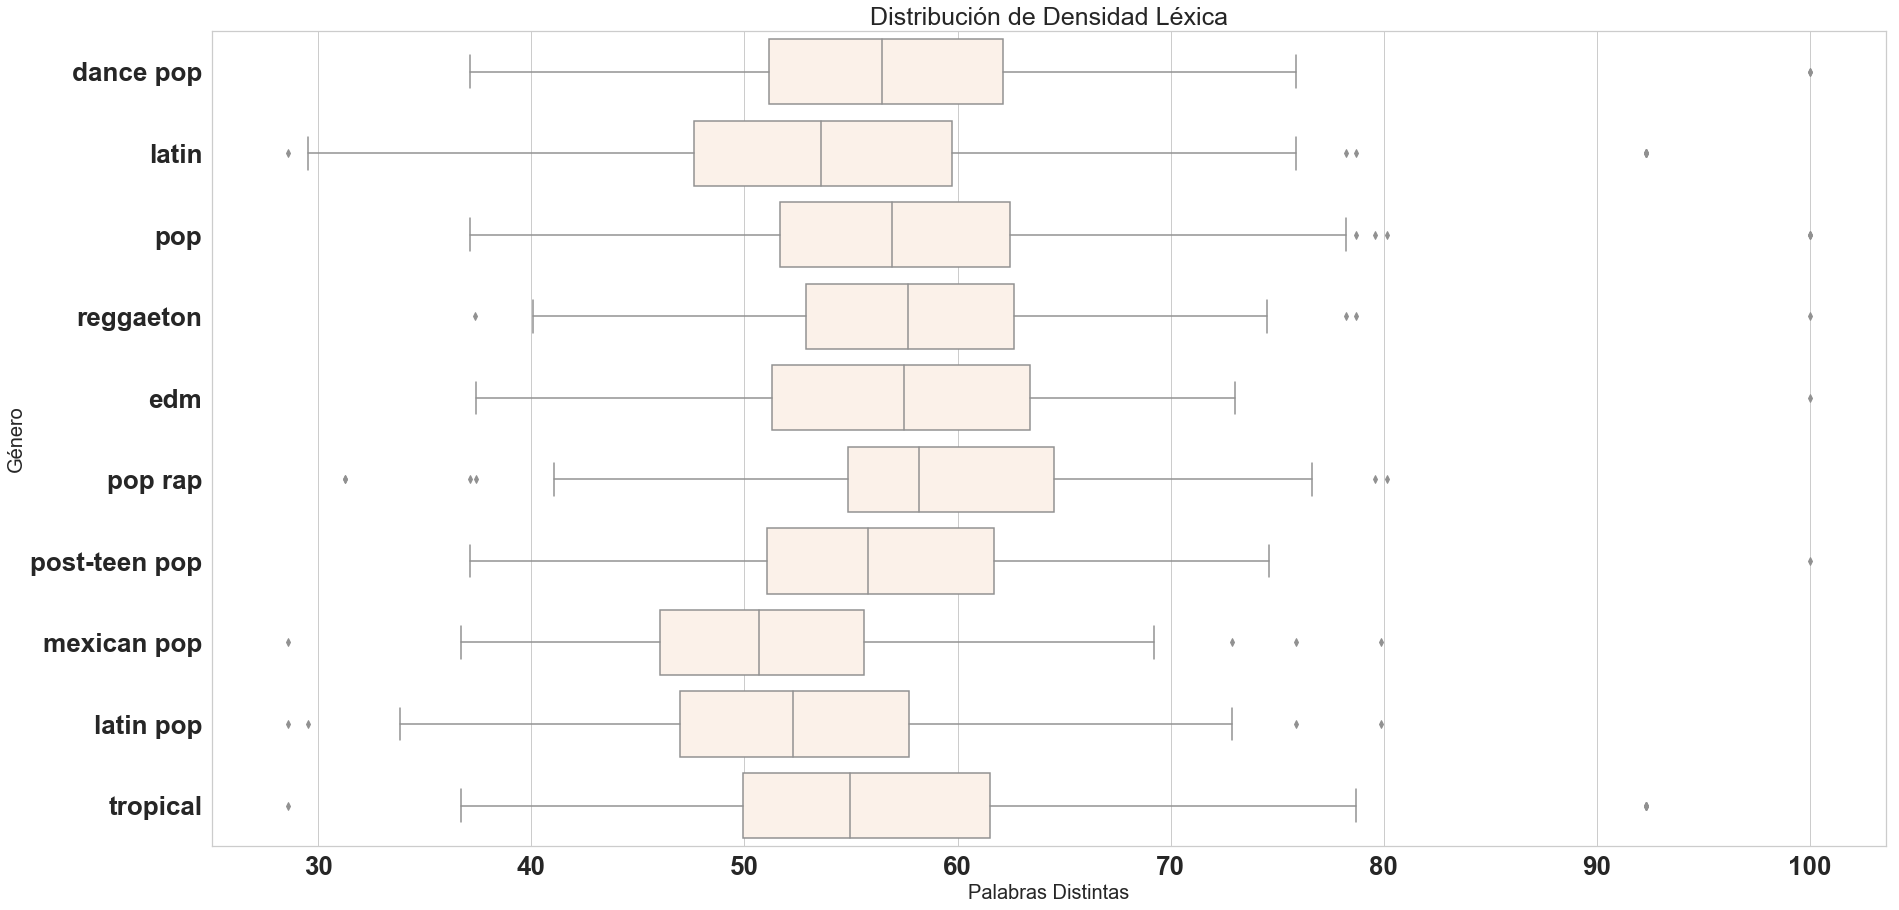

In [40]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.boxplot(x="le_d", y="genres", data=music_subset2, orient='h', palette=sns.light_palette("orange", n_colors=len(music_subset2), input="xkcd"))
#ax = sns.swarmplot(x="le_d", y="genres", data=music_subset2, orient='h', size=10, color="xkcd:charcoal")
plt.xlabel('Palabras Distintas', fontsize=20)
plt.ylabel('Género', fontsize=20)
plt.title('Distribución de Densidad Léxica', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(26)
    tick.label.set_fontweight("bold")
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(26)
    tick.label.set_fontweight("bold")
#plt.savefig('img/tempo_by_albums.jpg')

plt.plot();

In [32]:
music['lyrics'].dropna(inplace= True)

In [33]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords
 
NUM_TOPICS = 5
STOPWORDS = stopwords.words('english') + stopwords.words('spanish')
 
def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
# For gensim we need to tokenize the data and filter out stopwords
tokenized_data = []
data = music['lyrics']
for text in data:
    tokenized_data.append(clean_text(text))
 
 
# Build a Dictionary - association word to numeric id
dictionary = corpora.Dictionary(tokenized_data)
 
# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in tokenized_data]
 
# Have a look at how the 20th document looks like: [(word_id, count), ...]
print(corpus[20])
# [(12, 3), (14, 1), (21, 1), (25, 5), (30, 2), (31, 5), (33, 1), (42, 1), (43, 2),  ...
 
# Build the LDA model
lda_model = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)
 
# Build the LSI model
lsi_model = models.LsiModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

C:\Users\javie\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[(4, 1), (10, 12), (12, 1), (18, 1), (40, 1), (53, 2), (54, 5), (64, 1), (72, 7), (75, 2), (82, 4), (87, 1), (104, 6), (110, 1), (119, 6), (130, 6), (155, 6), (158, 1), (180, 1), (207, 1), (223, 1), (225, 6), (249, 1), (263, 4), (269, 2), (287, 1), (304, 8), (305, 1), (386, 1), (418, 1), (429, 1), (524, 1), (593, 1), (648, 5), (748, 1), (755, 2), (767, 4), (809, 1), (836, 1), (1068, 2), (1092, 2), (1125, 6), (1202, 6), (1215, 1), (1216, 1), (1217, 1), (1218, 1), (1219, 1), (1220, 1), (1221, 1), (1222, 1), (1223, 2), (1224, 1), (1225, 3), (1226, 3), (1227, 1), (1228, 2), (1229, 3), (1230, 1), (1231, 1), (1232, 2), (1233, 1), (1234, 1), (1235, 1), (1236, 1), (1237, 1), (1238, 1), (1239, 6), (1240, 1), (1241, 1), (1242, 1), (1243, 1), (1244, 2), (1245, 1), (1246, 1), (1247, 3), (1248, 1), (1249, 1), (1250, 1), (1251, 1), (1252, 1), (1253, 6), (1254, 5), (1255, 1), (1256, 2), (1257, 1), (1258, 1), (1259, 2), (1260, 1), (1261, 1), (1262, 1), (1263, 1), (1264, 1), (1265, 1), (1266, 1), (1267

In [34]:
print("LDA Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 5))
 
print("=" * 20)
 
print("LSI Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lsi_model.print_topic(idx, 5))
 
print("=" * 20)

LDA Model:
Topic #0: 0.012*"know" + 0.010*"yeah" + 0.009*"like" + 0.007*"let" + 0.006*"one"
Topic #1: 0.012*"quiero" + 0.009*"yeah" + 0.007*"baby" + 0.007*"love" + 0.006*"amor"
Topic #2: 0.016*"love" + 0.013*"like" + 0.011*"got" + 0.010*"baby" + 0.009*"yeah"
Topic #3: 0.017*"yeah" + 0.011*"know" + 0.010*"amor" + 0.009*"got" + 0.008*"like"
Topic #4: 0.013*"baby" + 0.008*"know" + 0.008*"thunder" + 0.007*"got" + 0.006*"like"
LSI Model:
Topic #0: -0.491*"yeah" + -0.325*"like" + -0.315*"know" + -0.296*"love" + -0.280*"got"
Topic #1: -0.940*"thunder" + -0.233*"thun-" + -0.155*"th-th-thunder" + -0.097*"lightning" + -0.097*"feel"
Topic #2: -0.701*"yeah" + 0.603*"love" + 0.111*"let" + 0.103*"come" + 0.088*"baby"
Topic #3: -0.455*"baby" + -0.356*"quiero" + -0.255*"amor" + 0.193*"like" + 0.180*"got"
Topic #4: 0.565*"low" + -0.558*"love" + -0.335*"yeah" + 0.225*"know" + 0.209*"like"


In [35]:
import pyLDAvis.gensim
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(panel, 'lda.html')
panel


C:\Users\javie\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.045623 -0.022060       1        1  29.383411
1     -0.025517  0.018548       2        1  18.968735
3      0.002917 -0.020039       3        1  18.941952
4     -0.041232 -0.018663       4        1  17.979221
0      0.018210  0.042213       5        1  14.726679, topic_info=      Category         Freq        Term        Total  loglift  logprob
term                                                                  
9877   Default   543.000000     thunder   543.000000  30.0000  30.0000
733    Default  2554.000000        yeah  2554.000000  29.0000  29.0000
14180  Default   160.000000     machika   160.000000  28.0000  28.0000
122    Default  2198.000000        know  2198.000000  27.0000  27.0000
9667   Default   215.000000         doo   215.000000  26.0000  26.0000
269    Default  1434.000000        amor  1434.000000  25.0000  25.0000
473    Default   589.000000         hey   589.000000  24.0000  24.0000
64     Default  1665.000000      quiero  1665.000000  23.0000  23.0000
8414   Default    89.000000        hula    89.000000  22.0000  22.0000
644    Default  1281.000000         let  1281.000000  21.0000  21.0000
648    Default  2215.000000        love  2215.000000  20.0000  20.0000
676    Default   223.000000        side   223.000000  19.0000  19.0000
885    Default   716.000000         ooh   716.000000  18.0000  18.0000
610    Default   252.000000      coming   252.000000  17.0000  17.0000
1625   Default   216.000000         low   216.000000  16.0000  16.0000
560    Default  1002.000000         one  1002.000000  15.0000  15.0000
263    Default   582.000000        solo   582.000000  14.0000  14.0000
649    Default   379.000000        made   379.000000  13.0000  13.0000
2250   Default   160.000000         fly   160.000000  12.0000  12.0000
13431  Default   111.000000         tam   111.000000  11.0000  11.0000
920    Default   510.000000      better   510.000000  10.0000  10.0000
339    Default   369.000000         yeh   369.000000   9.0000   9.0000
4      Default  2261.000000        baby  2261.000000   8.0000   8.0000
14392  Default    64.000000        halo    64.000000   7.0000   7.0000
938    Default   712.000000         way   712.000000   6.0000   6.0000
19     Default   256.000000        dame   256.000000   5.0000   5.0000
9876   Default   133.000000       thun-   133.000000   4.0000   4.0000
32     Default   717.000000        feel   717.000000   3.0000   3.0000
241    Default   528.000000         hoy   528.000000   2.0000   2.0000
87     Default   622.000000         voy   622.000000   1.0000   1.0000
...        ...          ...         ...          ...      ...      ...
32      Topic5   180.518478        feel   717.672791   0.5353  -5.3608
560     Topic5   214.267319         one  1002.309814   0.3727  -5.1895
733     Topic5   396.107025        yeah  2554.851074   0.0514  -4.5750
102     Topic5   193.275742        come   917.290527   0.3582  -5.2926
125     Topic5   352.027863        like  2220.840088   0.0736  -4.6930
145     Topic5   196.541031         say   978.236328   0.3106  -5.2758
3283    Topic5    68.187767       sorry   200.267822   0.8381  -6.3344
927     Topic5    66.381416       maybe   193.086609   0.8478  -6.3613
339     Topic5    98.963715         yeh   369.117981   0.5991  -5.9619
2248    Topic5    69.800262  everything   218.995865   0.7721  -6.3110
2630    Topic5    66.064468     another   200.621689   0.8047  -6.3661
87      Topic5   126.973267         voy   622.197205   0.3262  -5.7127
114     Topic5   167.119568         get  1013.263733   0.1133  -5.4380
503     Topic5   126.659332        tell   623.704895   0.3213  -5.7152
1592    Topic5    68.132133        fire   217.240295   0.7560  -6.3352
657     Topic5   129.396225        need   759.114990   0.1462  -5.6938
64      Topic5   189.317703      quiero  1665.577515  -0.2590  -5.3133
4       Topic5   204.709869  

In [36]:
#https://www.kaggle.com/navinch/interesting-visualizations-lda-word2vec
#https://nlpforhackers.io/topic-modeling/